# ORIE 4580/5580/5581 Assignment 5

#### Students: Boqian Niu (bn287)

### Github link: https://github.com/NBQian/ORIE-5581/blob/main/HW5.ipynb


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.



Each of the $N$ birds in the population is equally likely to visit the feeder.

The proportion of tagged birds in the population is:

$$
p = \frac{10}{N}
$$


Let $X$ be the total number of birds visiting the feeder in one week.

Then, the expected number of tagged birds visiting per week is:

$$
E[\text{tagged birds}] = p \times E[X] = \frac{10}{N} \times 28.8
$$

We set this theoretical mean equal to the observed sample mean (6 tagged birds per week):

$$
6 = \frac{10}{N} \times 28.8
$$

Solve for $N$:

$$
N = \frac{10 \times 28.8}{6} = 48
$$


Hence, the estimated total population of red-tailed hawks in Ithaca is 48.


<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.

Let $X$ be the number of tagged birds observed.

$$
P(X = x) = \frac{\binom{m}{x} \binom{N - m}{n - x}}{\binom{N}{n}}
$$

where:
- $m$ = number of tagged birds,
- $N$ = total population,
- $n$ = total observed birds,
- $x$ = tagged birds observed.


The likelihood of observing $x=4$ tagged birds is proportional to:

$$
L(N) = \frac{\binom{N - m}{n - x}}{\binom{N}{n}} \quad \text{(since } \binom{m}{x} \text{ does not depend on } N)
$$


$$
\frac{\text{tagged in sample}}{\text{total in sample}} = \frac{\text{tagged in population}}{\text{total population}}
$$

$$
\frac{4}{20} = \frac{10}{\hat{N}}
$$

Solve for $\hat{N}$:

$$
\hat{N} = \frac{10 \times 20}{4} = 50
$$

Hence, the MLE estimate for the total hawk population in Ithaca is 50.

<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.

Let  
- $N$ = true daily demand for soup, modeled as a geometric random variable  
  with parameter $p$:  
  $$
  P(N = k) = (1 - p)^k p, \quad k \ge 0
  $$
- $Y$ = observed number of soups sold per day.  
  Because the staff prepares at most 40 servings, the observed data are
  censored at 40:
  $$
  Y = \min(N, 40)
  $$


If $Y = k$ for $k = 0, 1, \dots, 39$, then the true demand $N$ was also $k$.  
Thus,
$$
P(Y = k) = P(N = k) = (1 - p)^k p, \quad k = 0, 1, \dots, 39
$$


If $Y = 40$, it means that the demand exceeded the prepared amount:
$$
Y = 40 \iff N \ge 40
$$

Therefore,
$$
P(Y = 40) = P(N \ge 40)
           = \sum_{k = 40}^{\infty} (1 - p)^k p
           = (1 - p)^{40}
$$


$$
P(Y = y) =
\begin{cases}
(1 - p)^y p, & y = 0, 1, \dots, 39 \\
(1 - p)^{40}, & y = 40
\end{cases}
$$


- For $y < 40$, the observed sales equal the true demand.  
- For $y = 40$, the data are censored, representing all days when the true demand exceeded the 40-soup limit.


<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [31]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize_scalar

data = pd.read_csv("Soup_sales_data.csv")
y = data['Y'].values

def neg_log_likelihood(p, y, censor_limit=40):
    if p <= 0 or p >= 1:
        return np.inf
    
    uncensored = y[y < censor_limit]
    ll_uncensored = np.sum(uncensored * np.log(1 - p) + np.log(p))
    
    censored = y[y == censor_limit]
    ll_censored = len(censored) * (censor_limit * np.log(1 - p))
    return -(ll_uncensored + ll_censored)

result = minimize_scalar(neg_log_likelihood, bounds=(1e-6, 1 - 1e-6), args=(y,), method='bounded')
p_hat = result.x

print(f"Estimated MLE for p: {p_hat:.4f}")


Estimated MLE for p: 0.0268


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

For $n$ people, the first person can have any of 365 birthdays,  
the second person can have any of the remaining 364, and so on.

Hence, the probability that all birthdays are distinct is:

$$
P(\text{no shared birthday}) =
\frac{365 \times 364 \times 363 \times \cdots \times (365 - n + 1)}{365^n}
= \frac{365!}{(365 - n)! \, 365^n}
$$

The complement of all birthdays being distinct gives:

$$
P(\text{at least one shared}) = 1 - P(\text{no shared birthday})
$$

So,

$$
P_n = 1 - \frac{365!}{(365 - n)! \, 365^n}
$$

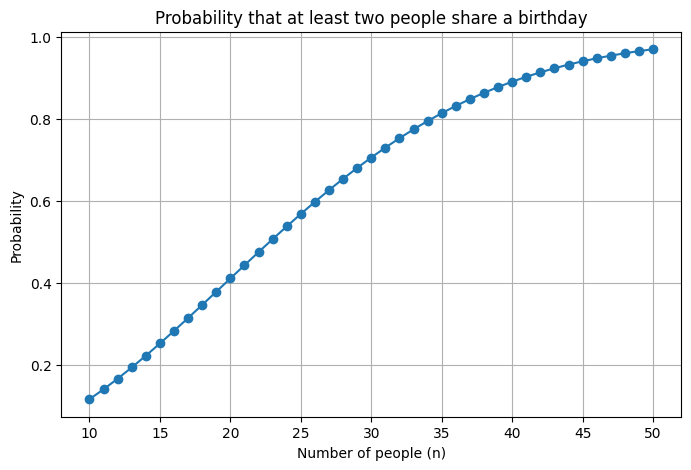

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt

def birthday_prob(n):
    if n > 365:
        return 1.0
    p_no_shared = math.prod([(365 - k) / 365 for k in range(n)])
    return 1 - p_no_shared

n_values = np.arange(10, 51)
p_values = [birthday_prob(n) for n in n_values]

plt.figure(figsize=(8,5))
plt.plot(n_values, p_values, marker='o')
plt.title("Probability that at least two people share a birthday")
plt.xlabel("Number of people (n)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

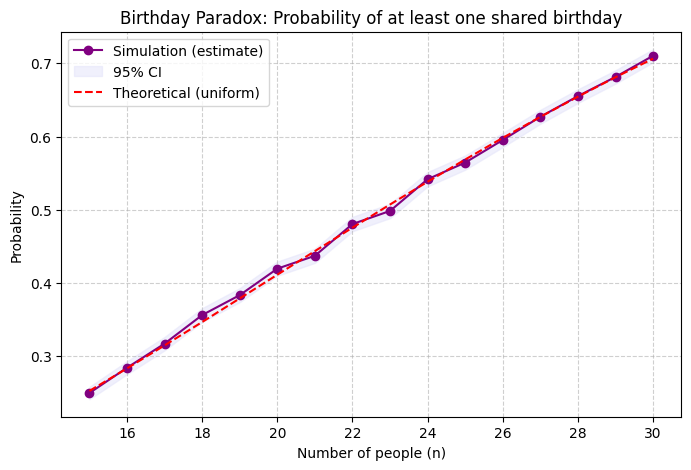

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def birthday_prob_theoretical(n: int) -> float:
    if n > 365:
        return 1.0
    p_no = 1.0
    for k in range(n):
        p_no *= (365.0 - float(k)) / 365.0
    return 1.0 - p_no

def simulate_birthday_prob(n: int, n_sim: int = 10000, rng=None):
    rng = np.random.default_rng(rng)
    count_shared = 0
    for _ in range(n_sim):
        birthdays = rng.integers(0, 365, size=n)
        if len(np.unique(birthdays)) < n:
            count_shared += 1
    p_hat = count_shared / n_sim
    se = np.sqrt(p_hat * (1 - p_hat) / n_sim)
    ci_low = p_hat - 1.96 * se
    ci_high = p_hat + 1.96 * se
    return p_hat, ci_low, ci_high

n_values = np.arange(15, 31, dtype=int)
sim_results = np.array([simulate_birthday_prob(int(n), n_sim=10000) for n in n_values])
p_sim = sim_results[:, 0]
ci_low = sim_results[:, 1]
ci_high = sim_results[:, 2]

p_theoretical = np.array([birthday_prob_theoretical(int(n)) for n in n_values])

plt.figure(figsize=(8,5))
plt.plot(n_values, p_sim, 'o-', color='purple', label='Simulation (estimate)')
plt.fill_between(n_values, ci_low, ci_high, color='lavender', alpha=0.6, label='95% CI')
plt.plot(n_values, p_theoretical, 'r--', label='Theoretical (uniform)')
plt.title('Birthday Paradox: Probability of at least one shared birthday')
plt.xlabel('Number of people (n)')
plt.ylabel('Probability')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

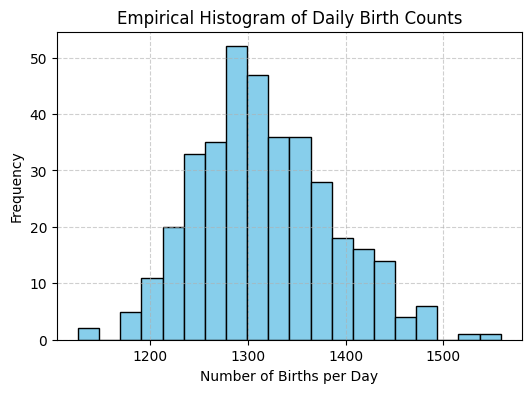

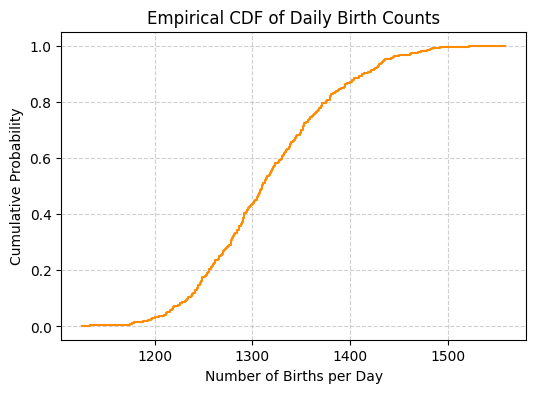

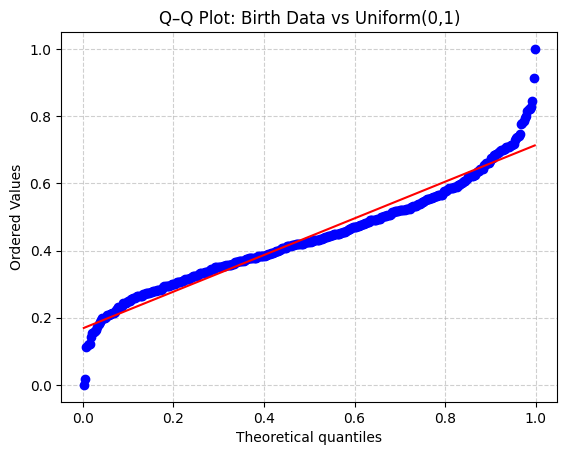

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv("bdaydata.txt", sep="\s+")
counts = data["count"]

plt.figure(figsize=(6,4))
plt.hist(counts, bins=20, color="skyblue", edgecolor="black")
plt.title("Empirical Histogram of Daily Birth Counts")
plt.xlabel("Number of Births per Day")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

sorted_counts = np.sort(counts)
cdf = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)

plt.figure(figsize=(6,4))
plt.step(sorted_counts, cdf, where="post", color="darkorange")
plt.title("Empirical CDF of Daily Birth Counts")
plt.xlabel("Number of Births per Day")
plt.ylabel("Cumulative Probability")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

counts_norm = (counts - counts.min()) / (counts.max() - counts.min())
stats.probplot(counts_norm, dist="uniform", plot=plt)
plt.title("Q–Q Plot: Birth Data vs Uniform(0,1)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [35]:
## Chi-square test

import pandas as pd
from scipy import stats
data = pd.read_csv("bdaydata.txt", sep="\s+")
counts = data["count"]

expected = [counts.mean()] * len(counts)

chi_stat, chi_p = stats.chisquare(f_obs=counts, f_exp=expected)
print("Chi-square Test")
print(f"Chi-square statistic = {chi_stat:.4f}")
print(f"p-value = {chi_p:.4e}")

Chi-square Test
Chi-square statistic = 1352.7234
p-value = 1.2489e-113


In [36]:
## K-S test

counts_norm = (counts - counts.min()) / (counts.max() - counts.min())

ks_stat, ks_p = stats.kstest(counts_norm, 'uniform')
print("\nKolmogorov–Smirnov Test")
print(f"K–S statistic = {ks_stat:.4f}")
print(f"p-value = {ks_p:.4e}")



Kolmogorov–Smirnov Test
K–S statistic = 0.2429
p-value = 1.9180e-19


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

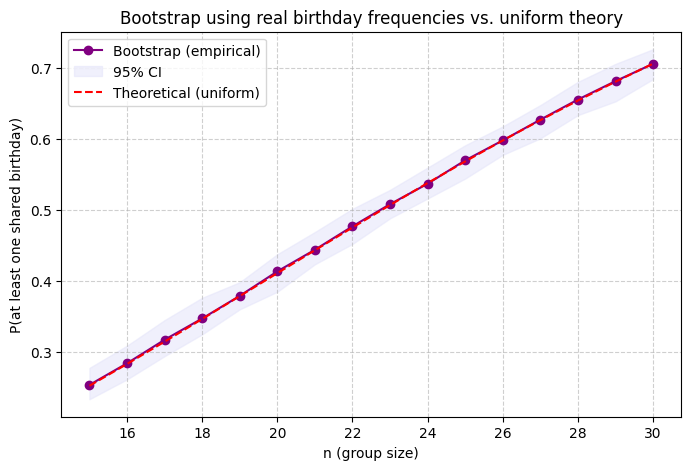

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("bdaydata.txt", sep=r"\s+")
emp_probs = df["count"].to_numpy(dtype=float)
emp_probs /= emp_probs.sum()
days = np.arange(365)
rng = np.random.default_rng(42)

def birthday_prob_uniform(n: int) -> float:
    p = 1.0
    for k in range(n):
        p *= (365.0 - k) / 365.0
    return 1.0 - p

def bootstrap_shared_prob(n: int, B: int = 120, T: int = 1500):
    p_hats = np.empty(B, dtype=float)
    for b in range(B):
        p = rng.choice(emp_probs, size=365, replace=True); p /= p.sum()
        draws = rng.choice(days, size=(T, n), p=p)
        s = np.sort(draws, axis=1)
        shared = (s[:, 1:] == s[:, :-1]).any(axis=1)
        p_hats[b] = shared.mean()
    return float(p_hats.mean()), float(np.percentile(p_hats, 2.5)), float(np.percentile(p_hats, 97.5))

n_vals = np.arange(15, 31, dtype=int)
boot_est, lo, hi = zip(*(bootstrap_shared_prob(int(n)) for n in n_vals))
theory = np.array([birthday_prob_uniform(int(n)) for n in n_vals])

plt.figure(figsize=(8,5))
plt.plot(n_vals, boot_est, 'o-', color='purple', label='Bootstrap (empirical)')
plt.fill_between(n_vals, lo, hi, color='lavender', alpha=0.6, label='95% CI')
plt.plot(n_vals, theory, 'r--', label='Theoretical (uniform)')
plt.xlabel("n (group size)")
plt.ylabel("P(at least one shared birthday)")
plt.title("Bootstrap using real birthday frequencies vs. uniform theory")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


## Ans.

- Both plots rise nearly linearly in this range and cross 50% at n ≈ 23.
- Level:The bootstrap curve sits almost on top of the uniform curve from part (b) for all $(15 \le n \le 30)$; differences are visually negligible.
- CIs in the bootstrap plot are slightly wider, but still tight and overlapping the uniform curve everywhere.

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

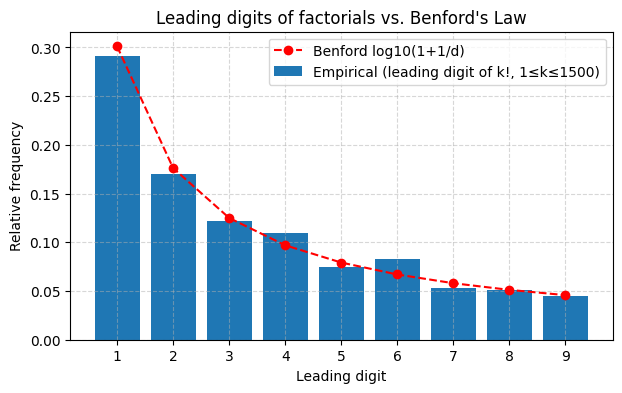

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

n = 1500
k = np.arange(1, n + 1)
fact_series = factorial(k, exact=True)

first_digit = np.fromiter((int(str(x)[0]) for x in fact_series), dtype=int, count=n)

digits = np.arange(1, 10)
emp_freq = np.array([(first_digit == d).mean() for d in digits])
benford = np.log10(1 + 1 / digits)

plt.figure(figsize=(7,4))
plt.bar(digits, emp_freq, width=0.8, label='Empirical (leading digit of k!, 1≤k≤1500)')
plt.plot(digits, benford, 'r--o', label='Benford log10(1+1/d)')
plt.xticks(digits)
plt.xlabel('Leading digit')
plt.ylabel('Relative frequency')
plt.title("Leading digits of factorials vs. Benford's Law")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [39]:
import numpy as np
from scipy.special import factorial
from scipy.stats import chisquare

# data: leading digits of k!, k=1..1500
n = 1500
k = np.arange(1, n + 1)
fact_series = factorial(k, exact=True)
first_digit = np.fromiter((int(str(x)[0]) for x in fact_series), dtype=int, count=n)

# Chi-square GOF test against Uniform({1,...,9})
obs = np.array([(first_digit == d).sum() for d in range(1,10)])
exp = np.full(9, n/9.0)
chi2, p = chisquare(f_obs=obs, f_exp=exp)

print("Observed counts:", obs.tolist())
print("Expected (uniform):", exp.astype(int).tolist())
print(f"Chi-square statistic = {chi2:.4f}, p-value = {p:.4e}")


Observed counts: [437, 255, 183, 164, 112, 124, 80, 77, 68]
Expected (uniform): [166, 166, 166, 166, 166, 166, 166, 166, 166]
Chi-square statistic = 667.5120, p-value = 7.0414e-139


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [40]:
import numpy as np
from scipy.special import factorial
from scipy.stats import chisquare

n = 1500
k = np.arange(1, n + 1)
fact_series = factorial(k, exact=True)
first_digit = np.fromiter((int(str(x)[0]) for x in fact_series), dtype=int, count=n)

obs = np.array([(first_digit == d).sum() for d in range(1,10)])
p_benford = np.log10((np.arange(2,11)) / (np.arange(1,10)))
exp = n * p_benford

chi2, pval = chisquare(f_obs=obs, f_exp=exp)

print("Observed counts:", obs.tolist())
print("Expected (Benford):", np.round(exp, 2).tolist())
print(f"Chi-square statistic = {chi2:.4f}, p-value = {pval:.4e}")


Observed counts: [437, 255, 183, 164, 112, 124, 80, 77, 68]
Expected (Benford): [451.54, 264.14, 187.41, 145.37, 118.77, 100.42, 86.99, 76.73, 68.64]
Chi-square statistic = 9.7683, p-value = 2.8167e-01


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

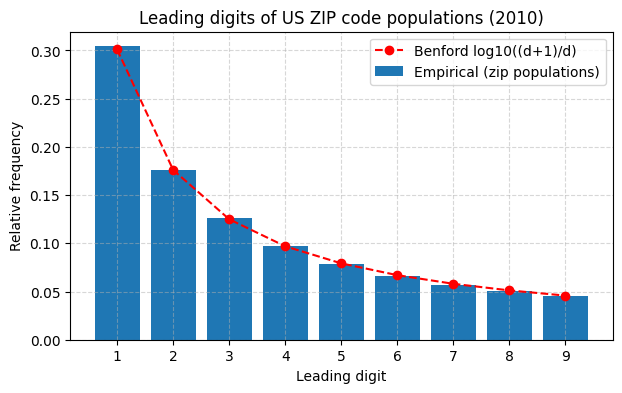

Observed counts: [30420, 17560, 12615, 9702, 7841, 6594, 5637, 5088, 4543]
Uniform χ²=50323.54, p=0.000e+00
Benford χ²=11.84, p=1.583e-01


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

df = pd.read_csv("us_pop.csv")
num_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
pop = df[num_cols[0]].astype(float)

x = pop[np.isfinite(pop) & (pop > 0)]
lead = x.astype(str).str.replace(r"\.0+$", "", regex=True).str.replace(r"[^0-9]", "", regex=True).str.lstrip("0").str[0].dropna()
lead = lead.astype(int)
obs = np.array([(lead == d).sum() for d in range(1,10)])
n = obs.sum()

digits = np.arange(1,10)
emp_freq = obs / n
benford = np.log10((digits+1)/digits)

plt.figure(figsize=(7,4))
plt.bar(digits, emp_freq, width=0.8, label="Empirical (zip populations)")
plt.plot(digits, benford, 'r--o', label="Benford log10((d+1)/d)")
plt.xticks(digits)
plt.xlabel("Leading digit")
plt.ylabel("Relative frequency")
plt.title("Leading digits of US ZIP code populations (2010)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

chi2_uni, p_uni = chisquare(f_obs=obs, f_exp=np.full(9, n/9.0))
chi2_ben, p_ben = chisquare(f_obs=obs, f_exp=n*benford)

print("Observed counts:", obs.tolist())
print(f"Uniform χ²={chi2_uni:.2f}, p={p_uni:.3e}")
print(f"Benford χ²={chi2_ben:.2f}, p={p_ben:.3e}")


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.